In [34]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt #pacote de visualização de gráficos.
import seaborn as sns #pacote de visualização de gráficos.

In [35]:
df = pd.read_csv(r"vgsales.csv") #encoding='iso-8859-1')
df.columns.str.lower().str.replace(' ', '_') # colocando o index em minusculo e trocando espaços por _
df.columns = df.columns.str.lower().str.replace(' ', '_') #atribuindo as colunas a ela mesmas para tranformar de series para dataframe 
df.head(10)

,rank,name,platform,year,genre,publisher,na_sales,eu_sales,jp_sales,other_sales,global_sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
5,6,Tetris,GB,1989.0,Puzzle,Nintendo,23.20,2.26,4.22,0.58,30.26
6,7,New Super Mario Bros.,DS,2006.0,Platform,Nintendo,11.38,9.23,6.50,2.90,30.01
7,8,Wii Play,Wii,2006.0,Misc,Nintendo,14.03,9.20,2.93,2.85,29.02
8,9,New Super Mario Bros. Wii,Wii,2009.0,Platform,Nintendo,14.59,7.06,4.70,2.26,28.62
9,10,Duck Hunt,NES,1984.0,Shooter,Nintendo,26.93,0.63,0.28,0.47,28.31


In [36]:
df.describe()

,rank,year,na_sales,eu_sales,jp_sales,other_sales,global_sales
count,16598.000000,16327.000000,16598.000000,16598.000000,16598.000000,16598.000000,16598.000000
mean,8300.605254,2006.406443,0.264667,0.146652,0.077782,0.048063,0.537441
std,4791.853933,5.828981,0.816683,0.505351,0.309291,0.188588,1.555028
min,1.000000,1980.000000,0.000000,0.000000,0.000000,0.000000,0.010000
25%,4151.250000,2003.000000,0.000000,0.000000,0.000000,0.000000,0.060000
50%,8300.500000,2007.000000,0.080000,0.020000,0.000000,0.010000,0.170000
75%,12449.750000,2010.000000,0.240000,0.110000,0.040000,0.040000,0.470000
max,16600.000000,2020.000000,41.490000,29.020000,10.220000,10.570000,82.740000


In [37]:
print(df.shape) #verificando a quantidade de linhas e colunas do df

(16598, 11)


In [38]:
df.info()#verificando informações do df de forma mais completa 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   rank          16598 non-null  int64  
 1   name          16598 non-null  object 
 2   platform      16598 non-null  object 
 3   year          16327 non-null  float64
 4   genre         16598 non-null  object 
 5   publisher     16540 non-null  object 
 6   na_sales      16598 non-null  float64
 7   eu_sales      16598 non-null  float64
 8   jp_sales      16598 non-null  float64
 9   other_sales   16598 non-null  float64
 10  global_sales  16598 non-null  float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB


In [39]:
df.drop(columns=["rank"],axis=1,inplace=True) # retirando a col
df.duplicated().any() #verificando se possui algum dado duplicado

True

In [40]:
len(set(df["name"])) # quantidade de jogos 

11493

In [41]:
df.isnull().sum()

name              0
platform          0
year            271
genre             0
publisher        58
na_sales          0
eu_sales          0
jp_sales          0
other_sales       0
global_sales      0
dtype: int64

In [42]:
df=df.dropna()
df.isnull().sum()

name            0
platform        0
year            0
genre           0
publisher       0
na_sales        0
eu_sales        0
jp_sales        0
other_sales     0
global_sales    0
dtype: int64

In [43]:
df.year.value_counts().sort_values(ascending = False) #contando a quantidade de games

2009.0    1431
2008.0    1428
2010.0    1257
2007.0    1201
2011.0    1136
2006.0    1008
2005.0     936
2002.0     829
2003.0     775
2004.0     744
2012.0     655
2015.0     614
2014.0     580
2013.0     546
2001.0     482
1998.0     379
2000.0     349
2016.0     342
1999.0     338
1997.0     289
1996.0     263
1995.0     219
1994.0     121
1993.0      60
1981.0      46
1992.0      43
1991.0      41
1982.0      36
1986.0      21
1989.0      17
1983.0      17
1990.0      16
1987.0      16
1988.0      15
1984.0      14
1985.0      14
1980.0       9
2017.0       3
2020.0       1
Name: year, dtype: int64

In [44]:
df['platform'].value_counts().index

Index(['DS', 'PS2', 'PS3', 'Wii', 'X360', 'PSP', 'PS', 'PC', 'XB', 'GBA', 'GC',
       '3DS', 'PSV', 'PS4', 'N64', 'SNES', 'XOne', 'SAT', 'WiiU', '2600',
       'NES', 'GB', 'DC', 'GEN', 'NG', 'SCD', 'WS', '3DO', 'TG16', 'GG',
       'PCFX'],
      dtype='object')

In [45]:
df.corr()

,year,na_sales,eu_sales,jp_sales,other_sales,global_sales
year,1.000000,-0.091285,0.006108,-0.169387,0.041128,-0.074647
na_sales,-0.091285,1.000000,0.768923,0.451283,0.634518,0.941269
eu_sales,0.006108,0.768923,1.000000,0.436379,0.726256,0.903264
jp_sales,-0.169387,0.451283,0.436379,1.000000,0.290559,0.612774
other_sales,0.041128,0.634518,0.726256,0.290559,1.000000,0.747964
global_sales,-0.074647,0.941269,0.903264,0.612774,0.747964,1.000000


In [46]:
pd.crosstab(df["platform"], df["genre"])

genre,Action,Adventure,Fighting,Misc,Platform,Puzzle,Racing,Role-Playing,Shooter,Simulation,Sports,Strategy
platform,,,,,,,,,,,,
2600,55,1,1,5,9,8,4,0,22,1,10,0
3DO,0,1,0,0,0,1,0,0,0,1,0,0
3DS,180,36,14,53,28,19,10,85,6,28,25,15
DC,3,11,12,0,2,0,6,4,3,1,10,0
DS,335,238,36,389,89,236,66,196,42,280,146,78
GB,6,5,0,8,18,15,2,21,1,5,9,7
GBA,162,36,23,86,139,39,64,73,40,18,88,18
GC,98,20,42,35,73,12,60,25,48,12,106,11
GEN,3,2,5,1,7,0,1,3,1,0,3,1


Text(0.5, 1.0, 'Gráfico 1: Total de games ranqueados por plataforma')

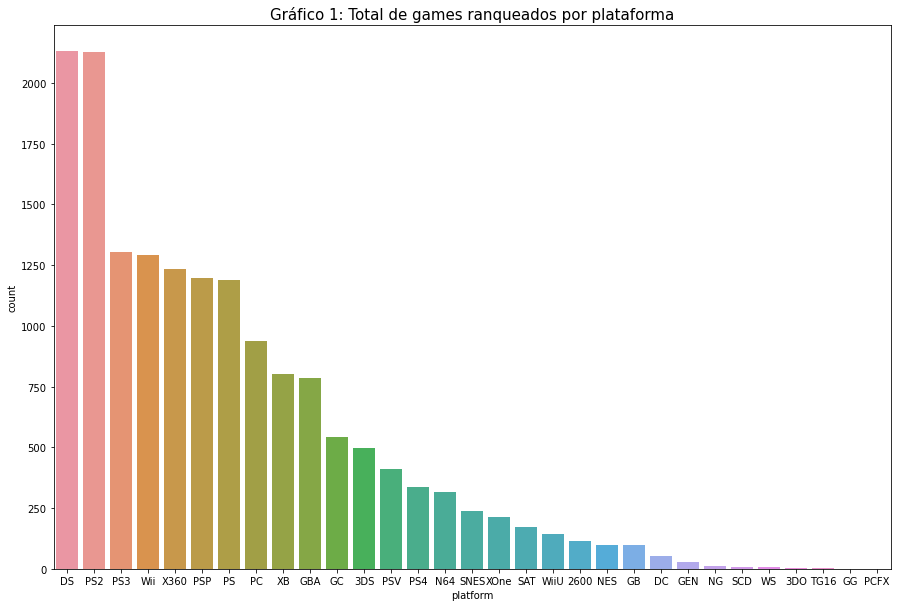

In [47]:
plt.figure(figsize=(15, 10))
grafico1 = sns.countplot(x='platform',data=df, order = df['platform'].value_counts().index)
grafico1.set_title('Gráfico 1: Total de games ranqueados por plataforma',fontsize=15)

In [48]:
manufac = {'DS':'Nintendo', 'PS2':'Playstation', 'PS3':'Playstation','Wii':'Nintendo','X360':'Microsoft XBOX','PSP':'Playstation','PS':'Playstation',
          'PC':'PC','XB':'Microsoft XBOX', 'GBA':'Nintendo','GC':'Nintendo','3DS':'Nintendo','PSV':'Playstation','PS4':'Playstation','N64':'Nintendo',
          'SNES':'Nintendo','XOne':'Microsoft XBOX','SAT':'Others','WiiU':'Nintendo','2600':'Others','NES':'Nintendo','GB':'Nintendo','DC':'Others','GEN':'Others',
          'NG':'Others','SCD':'Others','WS':'Others','3DO':'Others','TG16':'Others','GG':'Others','PCFX':'Others'}
df['manufacturer'] = df["platform"].replace(manufac)
df

,name,platform,year,genre,publisher,na_sales,eu_sales,jp_sales,other_sales,global_sales,manufacturer
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74,Nintendo
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,Nintendo
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82,Nintendo
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00,Nintendo
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,Nintendo
...,...,...,...,...,...,...,...,...,...,...,...
16593,Woody Woodpecker in Crazy Castle 5,GBA,2002.0,Platform,Kemco,0.01,0.00,0.00,0.00,0.01,Nintendo
16594,Men in Black II: Alien Escape,GC,2003.0,Shooter,Infogrames,0.01,0.00,0.00,0.00,0.01,Nintendo
16595,SCORE International Baja 1000: The Official Game,PS2,2008.0,Racing,Activision,0.00,0.00,0.00,0.00,0.01,Playstation
16596,Know How 2,DS,2010.0,Puzzle,7G//AMES,0.00,0.01,0.00,0.00,0.01,Nintendo


Text(0.5, 1.0, 'Gráfico 2: Total de jogos por fabricantes')

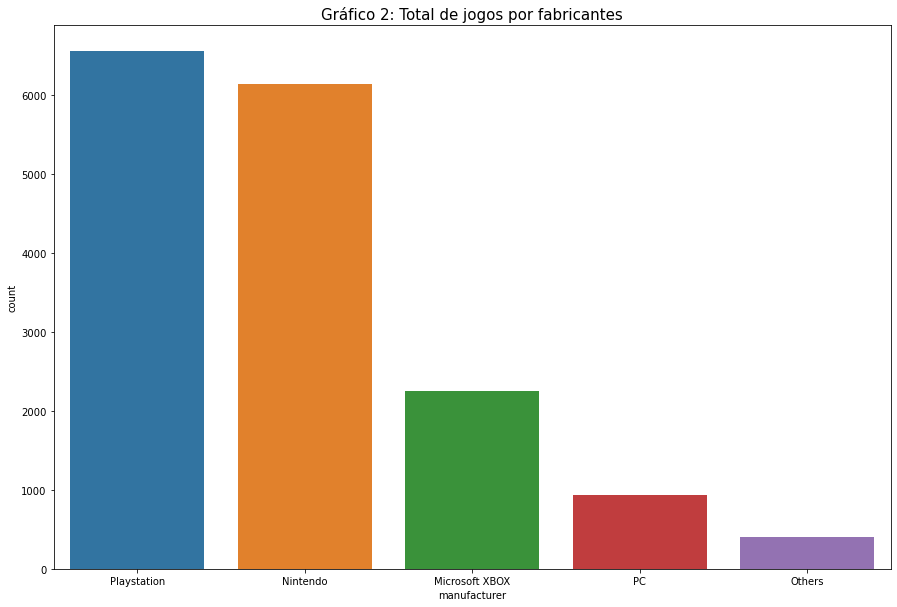

In [49]:
plt.figure(figsize=(15, 10))
grafico2 = sns.countplot(x ='manufacturer',data = df, order = df['manufacturer'].value_counts().index)
grafico2.set_title('Gráfico 2: Total de jogos por fabricantes',fontsize=15)

In [50]:
categorias = ['year','genre','global_sales','manufacturer']
df[categorias].head(20)

,year,genre,global_sales,manufacturer
0,2006.0,Sports,82.74,Nintendo
1,1985.0,Platform,40.24,Nintendo
2,2008.0,Racing,35.82,Nintendo
3,2009.0,Sports,33.00,Nintendo
4,1996.0,Role-Playing,31.37,Nintendo
5,1989.0,Puzzle,30.26,Nintendo
6,2006.0,Platform,30.01,Nintendo
7,2006.0,Misc,29.02,Nintendo
8,2009.0,Platform,28.62,Nintendo
9,1984.0,Shooter,28.31,Nintendo


Text(0.5, 1.0, 'Gráfico 3: Gênero mais escolhidos entre os players')

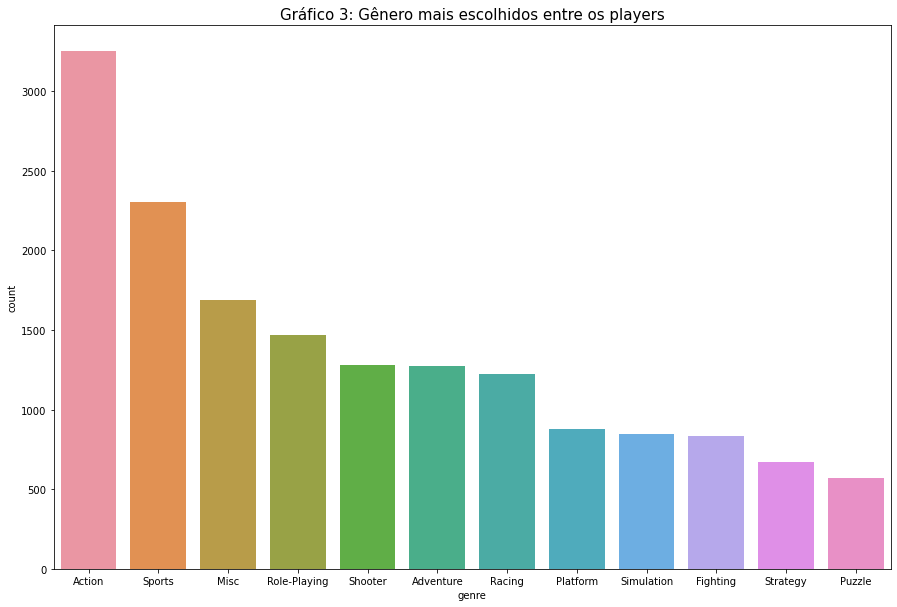

In [51]:
plt.figure(figsize=(15, 10))
grafico3=sns.countplot(x='genre',data=df, order = df['genre'].value_counts().index)
grafico3.set_title('Gráfico 3: Gênero mais escolhidos entre os players',fontsize=15)

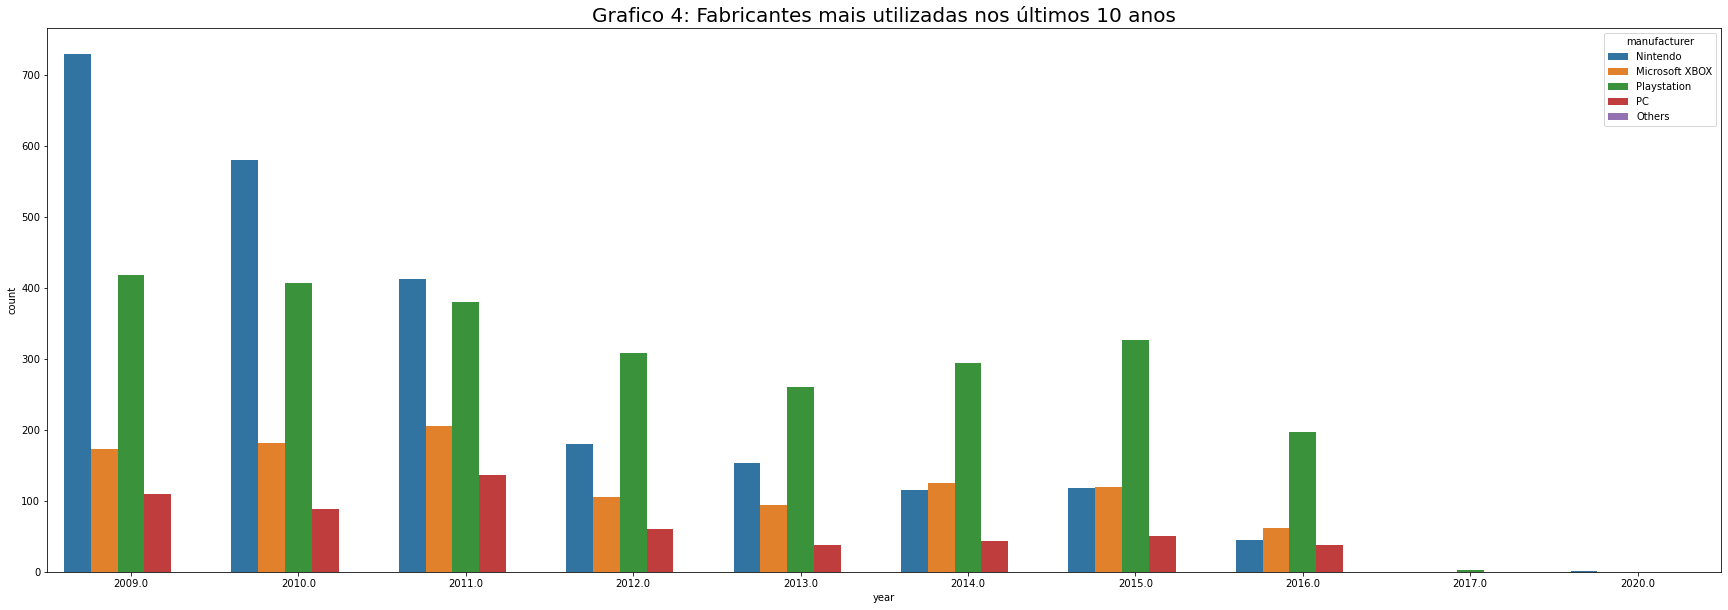

In [52]:
plt.figure(figsize=(30, 10))
maior2009 = df[df.year >= 2009.]
grafico4 = sns.countplot(x=maior2009.year, data=df, hue='manufacturer')
grafico4.set_title('Grafico 4: Fabricantes mais utilizadas nos últimos 10 anos',fontsize=20)
plt.legend(loc='upper right',title='manufacturer')